In [2]:
pip install  tkcalendar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 758.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


pip install --upgrade pandas_datareader


pip install --upgrade mplfinance

In [1]:
from tkinter import *
from tkcalendar import DateEntry
import datetime as dt
import yfinance as yf
import mplfinance as mpf
import talib as ta


In [2]:
def visualize():
    try:
       
        from_date = cal_from.get_date()
        to_date = cal_to.get_date()

        start = dt.datetime(from_date.year, from_date.month, from_date.day)
        end = dt.datetime(to_date.year, to_date.month, to_date.day)

      
        ticker = text_ticker.get().strip().upper()  

        if not ticker:
            raise ValueError("Please enter a valid ticker symbol.")
        
        
        try:
            data = yf.download(ticker, start=start, end=end)
        except Exception as e:
            raise ValueError(f"Could not retrieve data for ticker '{ticker}'. Please check the symbol and try again.") from e

        if data.empty:
            raise ValueError("No data found for the given ticker symbol and date range.")

        # Calculate Indicators
        data['SMA'] = ta.SMA(data["Close"], timeperiod=20)
        data["RSI"] = ta.RSI(data['Close'], timeperiod=20)
        data['Upper_BB'], data['Middle_BB'], data['Lower_BB'] = ta.BBANDS(
            data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

       
        data = data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI', 'Upper_BB', 'Middle_BB', 'Lower_BB']]


        add_plots = [
            mpf.make_addplot(data['SMA'], color='orange', label='SMA'),
            mpf.make_addplot(data['RSI'], panel=1, color='purple', label='RSI'),
            mpf.make_addplot(data['Upper_BB'], color='blue', label='Upper BB'),
            mpf.make_addplot(data['Lower_BB'], color='blue', label='Lower BB'),
        ]

        mpf.plot(data, type='candle', style='charles', title=f'{ticker} Share Price with Indicators',
                 ylabel='Price ($)', volume=True, addplot=add_plots)

    except Exception as e:
        print(f"Error: {e}")
        error_label.config(text=f"Error: {e}")

        


[*********************100%%**********************]  1 of 1 completed


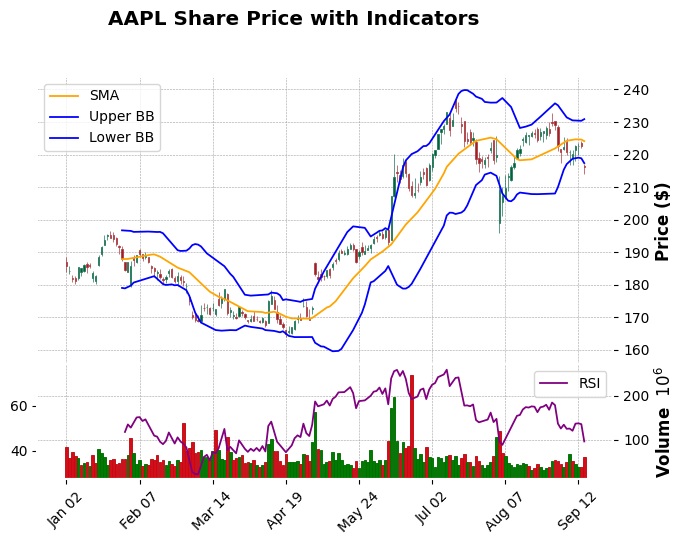

In [4]:
root = Tk()
root.title("Stock Visualizer")


label_from = Label(root, text="From:")
label_from.pack()
cal_from = DateEntry(root, width=50)
cal_from.pack(padx=10, pady=10)

label_to = Label(root, text="To:")
label_to.pack()
cal_to = DateEntry(root, width=50)
cal_to.pack(padx=10, pady=10)

label_ticker = Label(root, text="Ticker Symbol:")
label_ticker.pack()
text_ticker = Entry(root)
text_ticker.pack(padx=10, pady=10)

btn_visualize = Button(root, text="Visualize", command=visualize)
btn_visualize.pack(padx=10, pady=10)

error_label = Label(root, text="", fg="red")
error_label.pack()

root.mainloop()


[*********************100%%**********************]  1 of 1 completed
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an in

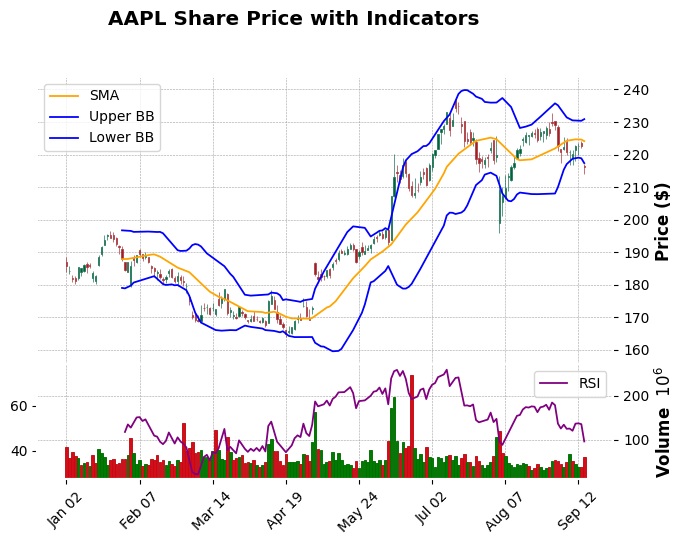

/var/folders/gz/pgdc8xgj6jv906fcwbl16fd40000gn/T/ipykernel_5557/404839416.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI', 'Upper_BB', 'Middle_BB', 'Lower_BB']], forecast_data], axis=0)
[*********************100%%**********************]  1 of 1 completed
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associa

Error: zero-size array to reduction operation maximum which has no identity


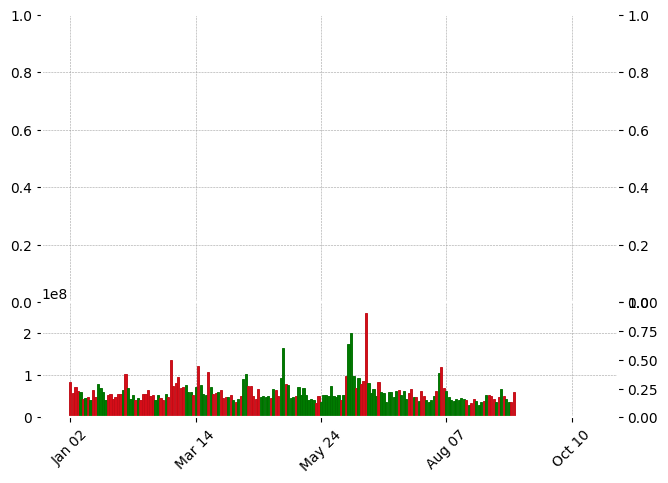

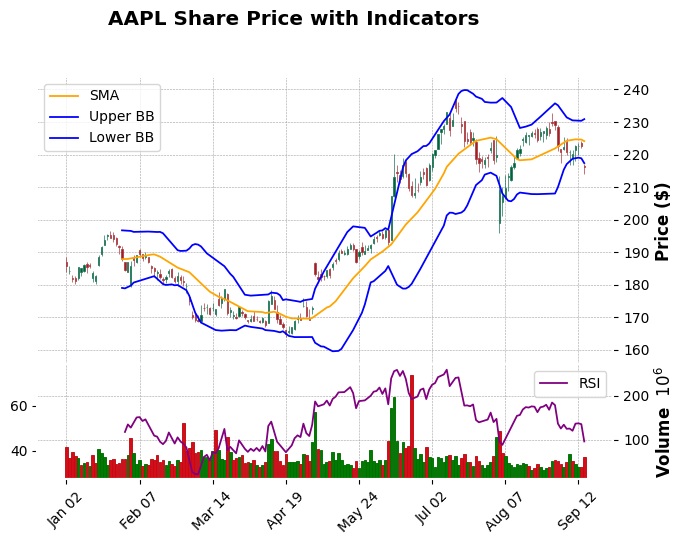

/var/folders/gz/pgdc8xgj6jv906fcwbl16fd40000gn/T/ipykernel_5557/404839416.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI', 'Upper_BB', 'Middle_BB', 'Lower_BB']], forecast_data], axis=0)


Error: zero-size array to reduction operation maximum which has no identity


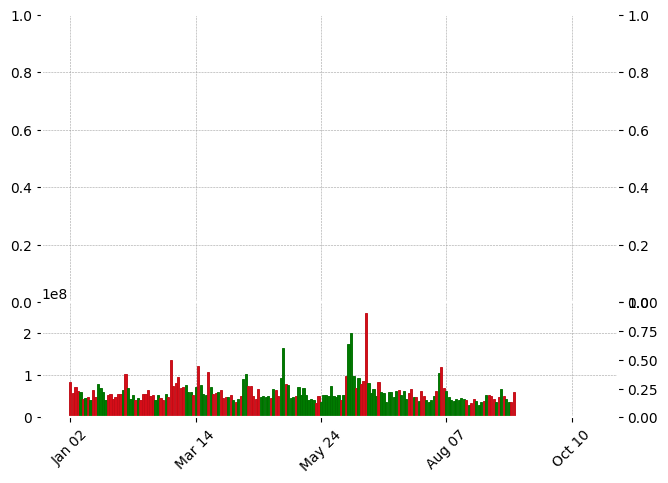

In [1]:
# from tkinter import *
# from tkcalendar import DateEntry
# import datetime as dt
# import yfinance as yf
# import mplfinance as mpf
# import talib as ta
# import pandas as pd
# import statsmodels.api as sm

# def visualize():
#     try:
#         from_date = cal_from.get_date()
#         to_date = cal_to.get_date()

#         start = dt.datetime(from_date.year, from_date.month, from_date.day)
#         end = dt.datetime(to_date.year, to_date.month, to_date.day)

#         ticker = text_ticker.get().strip().upper()  

#         if not ticker:
#             raise ValueError("Please enter a valid ticker symbol.")
        
#         try:
#             data = yf.download(ticker, start=start, end=end)
#         except Exception as e:
#             raise ValueError(f"Could not retrieve data for ticker '{ticker}'. Please check the symbol and try again.") from e

#         if data.empty:
#             raise ValueError("No data found for the given ticker symbol and date range.")

#         # Calculate Indicators
#         data['SMA'] = ta.SMA(data["Close"], timeperiod=20)
#         data["RSI"] = ta.RSI(data['Close'], timeperiod=20)
#         data['Upper_BB'], data['Middle_BB'], data['Lower_BB'] = ta.BBANDS(
#             data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

#         # Forecast Future Trends using ARIMA
#         try:
#             model = sm.tsa.ARIMA(data['Close'], order=(5, 1, 0))
#             model_fit = model.fit()
#             forecast_steps = 30  # Number of days to forecast
#             forecast = model_fit.forecast(steps=forecast_steps)
#         except Exception as e:
#             raise ValueError("Failed to generate forecast. Please check the data and try again.") from e

#         # Generate future dates
#         future_dates = [end + dt.timedelta(days=i) for i in range(1, forecast_steps + 1)]
#         forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])

#         # Initialize forecast_data
#         forecast_data = pd.DataFrame(index=forecast_df.index)
#         forecast_data['Forecast'] = forecast_df['Forecast']
#         forecast_data['Volume'] = pd.Series([0]*len(forecast_df), index=forecast_df.index)  # Initialize with zeros
#         forecast_data[['Open', 'High', 'Low', 'Close', 'SMA', 'RSI', 'Upper_BB', 'Middle_BB', 'Lower_BB']] = pd.NA

#         # Historical Data Plot
#         if not data.empty:
#             add_plots = [
#                 mpf.make_addplot(data['SMA'], color='orange', label='SMA'),
#                 mpf.make_addplot(data['RSI'], panel=1, color='purple', label='RSI'),
#                 mpf.make_addplot(data['Upper_BB'], color='blue', label='Upper BB'),
#                 mpf.make_addplot(data['Lower_BB'], color='blue', label='Lower BB')
#             ]

#             mpf.plot(data, type='candle', style='charles', title=f'{ticker} Share Price with Indicators',
#                      ylabel='Price ($)', volume=True, addplot=add_plots)

#         # Forecast Data Plot
#         combined_data = pd.concat([data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'RSI', 'Upper_BB', 'Middle_BB', 'Lower_BB']], forecast_data], axis=0)

#         # Ensure columns have no missing values
#         combined_data = combined_data.ffill().bfill()  # Forward fill and backward fill missing values

#         if not combined_data.empty:
#             add_forecast_plot = [
#                 mpf.make_addplot(forecast_data['Forecast'], color='red', label='Forecast')
#             ]

#             mpf.plot(combined_data, type='candle', style='charles', title=f'{ticker} Forecast',
#                      ylabel='Price ($)', volume=True, addplot=add_forecast_plot)
#         else:
#             error_label.config(text="No forecast data available to plot.")

#     except Exception as e:
#         print(f"Error: {e}")
#         error_label.config(text=f"Error: {e}")

# root = Tk()
# root.title("Stock Visualizer")

# label_from = Label(root, text="From:")
# label_from.pack()
# cal_from = DateEntry(root, width=50)
# cal_from.pack(padx=10, pady=10)

# label_to = Label(root, text="To:")
# label_to.pack()
# cal_to = DateEntry(root, width=50)
# cal_to.pack(padx=10, pady=10)

# label_ticker = Label(root, text="Ticker Symbol:")
# label_ticker.pack()
# text_ticker = Entry(root)
# text_ticker.pack(padx=10, pady=10)

# btn_visualize = Button(root, text="Visualize", command=visualize)
# btn_visualize.pack(padx=10, pady=10)

# error_label = Label(root, text="", fg="red")
# error_label.pack()

# root.mainloop()
